<body>
    <div class="container">
        <h1>Estudio de Clustering por K-Medias en NSCLC</h1>
        <h2>Introducción</h2>
        <p>
            El cáncer de pulmón no microcítico (NSCLC) es una de las principales causas de muerte por cáncer a nivel mundial y se clasifica en varios subtipos histológicos, siendo el adenocarcinoma (AC) y el carcinoma de células escamosas (SCC) los más comunes. Aunque se han identificado diferencias moleculares y clínicas significativas entre estos subtipos, las terapias específicas para cada uno siguen siendo limitadas. En un estudio seminal publicado en 2008, se realizó un análisis exhaustivo de la expresión génica en 58 muestras de NSCLC, revelando diferencias transcriptómicas entre AC y SCC, con más de 1.700 genes identificados como diferencialmente expresados. (Kuner.R, 2009)
        </p>
        <h2>Objetivo</h2>
        <p>
            El objetivo de este trabajo es aplicar técnicas de clustering por K-medias a los datos de expresión génica de NSCLC para identificar patrones de agrupamiento en los subtipos histológicos de adenocarcinoma (AC) y carcinoma de células escamosas (SCC). A diferencia del estudio original que utilizó clustering jerárquico, se empleará el método de K-medias para explorar cómo este enfoque puede ofrecer una visión alternativa de la diferenciación de subtipos.
        </p>
        <h2>Fundamento</h2>
        <p>
            El clustering por K-medias es una técnica de agrupamiento no supervisado que busca particionar un conjunto de datos en K clusters, minimizando la variabilidad intra-cluster y maximizando la variabilidad inter-cluster. A diferencia del clustering jerárquico, que construye una jerarquía de clusters, K-medias ofrece una forma más eficiente de asignar muestras a clusters predefinidos, lo cual puede ser ventajoso para analizar grandes volúmenes de datos y identificar patrones de expresión génica específicos de cada subtipo. Este enfoque permite una evaluación más robusta y precisa de la agrupación basada en características genómicas, con el objetivo de mejorar la comprensión de las diferencias moleculares entre AC y SCC en NSCLC y potencialmente descubrir nuevos patrones que puedan guiar futuras investigaciones y desarrollos terapéuticos.
        </p>
    </div>
</body>
</html>


In [3]:
!pip install kneed

# Imports</span>


In [5]:
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import shutil
import gzip
import os

## Descomprimir <b>archivo</b>

In [7]:
script_dir = os.getcwd()  #>- Ruta directorio actual
file_path = os.path.join(script_dir, 'GSE10245_series_matrix.txt.gz')
output_path = os.path.join(script_dir, 'GSE10245_series_matrix.txt')
# Abrir y descomprimir el archivo
with gzip.open(file_path, 'rb') as f_in:
    with open(output_path, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)
print("Archivo descomprimido exitosamente.")
warnings.filterwarnings('ignore')

Archivo descomprimido exitosamente.


# <span style="color:magenta"> Data</span>frame

In [9]:
data = pd.read_csv(os.path.join(script_dir, 'GSE10245_series_matrix.txt'), sep='\t', comment='!', index_col=0)
data

,GSM258551,GSM258552,GSM258553,GSM258554,GSM258555,GSM258556,GSM258557,GSM258558,GSM258559,GSM258560,...,GSM258599,GSM258600,GSM258601,GSM258602,GSM258603,GSM258604,GSM258605,GSM258606,GSM258607,GSM258608
ID_REF,,,,,,,,,,,,,,,,,,,,,
1007_s_at,9.129905,9.843349,9.730661,9.032165,10.281793,9.154551,8.063788,8.881805,9.039005,10.643545,...,9.628212,10.130757,9.276419,9.296957,10.346701,9.709068,7.672985,9.199080,7.635765,8.760082
1053_at,8.034022,7.973332,8.834045,7.723965,9.040800,8.792375,8.093354,7.575620,8.438594,9.142260,...,9.215567,8.273698,8.790710,8.861625,8.512193,7.908581,9.299454,8.220959,7.432135,7.596431
117_at,3.564520,4.994852,5.066018,4.958580,4.951835,6.428274,7.364676,4.659326,6.643723,5.368356,...,5.183919,4.801579,6.161777,5.443126,4.609810,4.339004,6.384404,6.006534,5.484470,5.372583
121_at,4.746490,5.197306,5.234618,6.078180,5.205632,5.009848,5.533000,5.362637,5.210988,5.195820,...,5.202508,4.807654,5.326347,5.205004,5.201123,6.028717,5.220915,5.186452,5.220778,5.097535
1255_g_at,2.320698,2.248520,2.259504,2.262787,2.207531,2.322618,2.656929,2.255955,2.266399,2.246563,...,2.248392,2.232021,2.246738,2.245739,2.265454,2.301397,2.322604,2.236494,2.243698,2.420731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AFFX-ThrX-5_at,10.003508,7.771444,8.345232,8.531927,7.843083,8.619985,8.192088,8.459969,8.133696,8.597967,...,7.387399,8.031311,7.984596,7.737230,8.564872,8.659886,8.099549,8.516927,8.623836,9.370287
AFFX-ThrX-M_at,10.393213,8.225886,8.812795,8.860925,8.409844,9.100826,8.560022,8.957035,8.568208,9.135185,...,7.711823,8.430552,8.377495,8.209230,8.916946,9.047079,8.520785,8.956350,8.997338,9.890908
AFFX-TrpnX-3_at,2.930119,2.634283,2.768278,2.807333,2.640676,2.679332,2.721338,2.751952,2.751926,2.689857,...,2.716943,2.670341,2.632467,2.700399,2.839539,2.653828,2.736934,2.697662,2.708367,2.727219


In [10]:
print("Valores nulos :")
print(data.isnull().sum().sum())  # Verifica el número total de valores nulos

Valores nulos :
0



<span style="font-weight: bold; font-style: italic; text-decoration: wavy; font-size: 35px;">58 Muestras de Non-small cell lung cancer (NSCLC)</span> 
### <span style="font-weight: bold; font-style: italic; text-decoration: wavy; font-size: 35px;">AC</span> = Adenocarcinoma (<span style="color:magenta">n</span>= 40)
### <span style="font-weight: bold; font-style: italic; text-decoration: wavy; font-size: 35px;">SCC</span> = Squamous Cell Carcinoma (<span style="color:magenta">n</span>= 18)


In [12]:
class_mapping = {
    'GSM258551': 'AC', 'GSM258552': 'AC', 'GSM258553': 'SCC', 'GSM258554': 'AC', 'GSM258555': 'SCC',
    'GSM258556': 'SCC', 'GSM258557': 'SCC', 'GSM258558': 'AC', 'GSM258559': 'AC', 'GSM258560': 'AC',
    'GSM258561': 'AC', 'GSM258562': 'SCC', 'GSM258563': 'SCC', 'GSM258564': 'AC', 'GSM258565': 'SCC',
    'GSM258566': 'SCC', 'GSM258567': 'AC', 'GSM258568': 'AC', 'GSM258569': 'AC', 'GSM258570': 'SCC',
    'GSM258571': 'AC', 'GSM258572': 'AC', 'GSM258573': 'AC', 'GSM258574': 'AC', 'GSM258575': 'AC',
    'GSM258576': 'AC', 'GSM258577': 'AC', 'GSM258578': 'SCC', 'GSM258579': 'AC', 'GSM258580': 'SCC',
    'GSM258581': 'AC', 'GSM258582': 'AC', 'GSM258583': 'SCC', 'GSM258584': 'AC', 'GSM258585': 'SCC',
    'GSM258586': 'AC', 'GSM258587': 'AC', 'GSM258588': 'AC', 'GSM258589': 'AC', 'GSM258590': 'SCC',
    'GSM258591': 'AC', 'GSM258592': 'AC', 'GSM258593': 'AC', 'GSM258594': 'SCC', 'GSM258595': 'AC',
    'GSM258596': 'SCC', 'GSM258597': 'AC', 'GSM258598': 'AC', 'GSM258599': 'SCC', 'GSM258600': 'AC',
    'GSM258601': 'AC', 'GSM258602': 'AC', 'GSM258603': 'SCC', 'GSM258604': 'AC', 'GSM258605': 'AC',
    'GSM258606': 'AC', 'GSM258607': 'AC', 'GSM258608': 'AC'
}
# Crear un vector de etiquetas basado en el diccionario
labels = data.columns.map(class_mapping)

labels

Index(['AC', 'AC', 'SCC', 'AC', 'SCC', 'SCC', 'SCC', 'AC', 'AC', 'AC', 'AC',
       'SCC', 'SCC', 'AC', 'SCC', 'SCC', 'AC', 'AC', 'AC', 'SCC', 'AC', 'AC',
       'AC', 'AC', 'AC', 'AC', 'AC', 'SCC', 'AC', 'SCC', 'AC', 'AC', 'SCC',
       'AC', 'SCC', 'AC', 'AC', 'AC', 'AC', 'SCC', 'AC', 'AC', 'AC', 'SCC',
       'AC', 'SCC', 'AC', 'AC', 'SCC', 'AC', 'AC', 'AC', 'SCC', 'AC', 'AC',
       'AC', 'AC', 'AC'],
      dtype='object')

In [13]:
labels_row = pd.Series(data.columns.map(class_mapping), index=data.columns, name='Label') #>Fila de Etiquetas
labels_df = labels_row.to_frame().T #>Transponer
labels_df.index = ['Labels'] #> Cambiar nombre del Índice
data = pd.concat([data, labels_df], sort=False) #>Concatenar
data = data.T
data.head()

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,Labels
GSM258551,9.129905,8.034022,3.56452,4.74649,2.320698,5.519153,3.339182,2.775395,8.303437,2.981327,...,13.031726,15.028729,14.586347,10.48334,10.003508,10.393213,2.930119,2.385704,2.771349,AC
GSM258552,9.843349,7.973332,4.994852,5.197306,2.24852,5.081258,2.934516,2.617097,9.145519,4.619668,...,12.250033,14.440756,14.072366,8.44302,7.771444,8.225886,2.634283,2.320409,2.595299,AC
GSM258553,9.730661,8.834045,5.066018,5.234618,2.259504,4.657257,3.007192,2.634559,9.159054,2.746464,...,11.798363,14.439887,14.011392,8.926655,8.345232,8.812795,2.768278,2.374852,2.67715,SCC
GSM258554,9.032165,7.723965,4.95858,6.07818,2.262787,4.535683,3.167112,3.127495,7.770354,6.212399,...,12.307684,14.557363,14.162145,9.015143,8.531927,8.860925,2.807333,2.397153,2.702299,AC
GSM258555,10.281793,9.0408,4.951835,5.205632,2.207531,3.731919,2.71179,2.707079,6.380928,4.528499,...,12.243207,14.612223,14.122751,8.631753,7.843083,8.409844,2.640676,2.312823,2.580743,SCC


# Replicación del cluster jerárquico realizado en el estudio de Kuner
## En el trabajo de Kuner se ocupó el cluster jerárquico en los 500 genes mas variables de las muestras para encontrar dos clusters diferentes los cuales estan fuertemente asociados a los subtipos histologicos AC y SCC

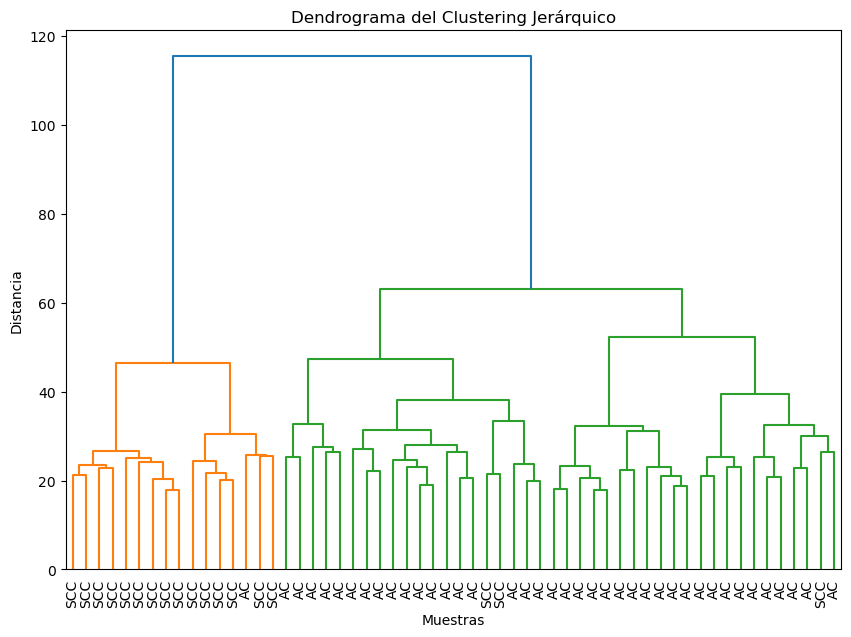

In [15]:
labels = data['Labels']  
data_numeric = data.drop(columns=['Labels'])
data_numeric = data_numeric.apply(pd.to_numeric, errors='coerce')
data_numeric = data_numeric.dropna(axis=1, how='any')

# Calcular la varianza de cada gen y seleccionar los 500 genes más variables
variance = data_numeric.var(axis=0)
top_500_genes = variance.nlargest(500).index
data_top_500 = data_numeric[top_500_genes]

# Estandarizar los datos de los 500 genes más variables
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_top_500)

# Clustering Jerárquico
Z = linkage(data_scaled, method='ward')  

# Dendograma
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=labels.values, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrograma del Clustering Jerárquico')
plt.xlabel('Muestras')
plt.ylabel('Distancia')
plt.show()

# Obtendremos las componentes principales de los 500 genes mas variables.
## Para realizar nuestro K-Medias capturaremos el 70%< de la varianza explicada

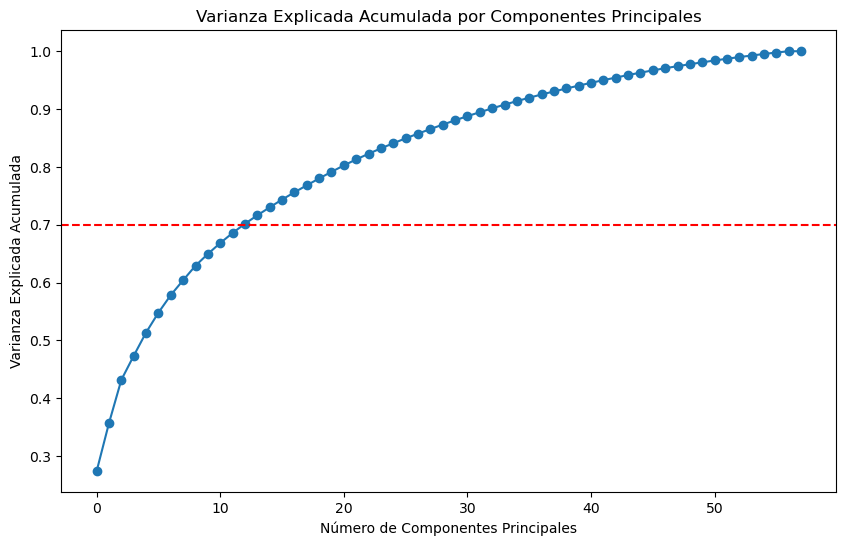

Número de componentes necesarios para alcanzar el 70.0% de varianza explicada: 13


In [17]:
# Realizar PCA 
pca = PCA()
pca.fit(data_scaled)

# Evaluar la varianza explicada acumulada
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# Graficar la varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.axhline(y=0.70, color='r', linestyle='--')  # Línea de referencia para el 7% de varianza explicada
plt.title('Varianza Explicada Acumulada por Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.show()

# Número de componentes necesarios para alcanzar el umbral del 70% de varianza explicada
threshold = 0.70
num_components = (cumulative_variance >= threshold).argmax() + 1
print(f'Número de componentes necesarios para alcanzar el {threshold*100}% de varianza explicada: {num_components}')

### 13 Componentes principales puede significar mucho ruido, nos quedaremos solo con los 50 genes mas variables

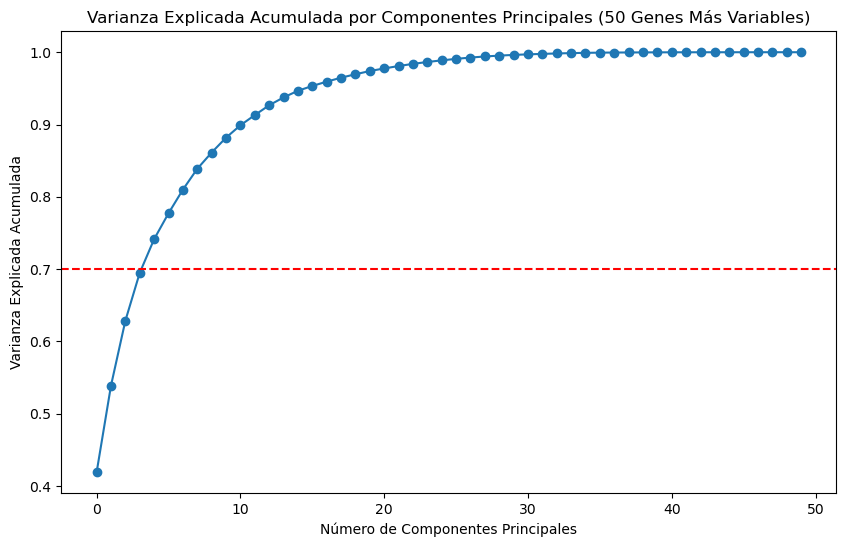

Número de componentes necesarios para alcanzar el 70.0% de varianza explicada: 5


In [19]:
# Seleccionar los 50 genes más variables
top_50_genes = data_numeric.var(axis=0).nlargest(50).index
data_top_50 = data_numeric[top_50_genes]

# Estandarizar los datos de los 50 genes más variables
scaler = StandardScaler()
data_top_50_scaled = scaler.fit_transform(data_top_50)

# Realizar PCA en los 50 genes más variables
pca = PCA()
pca.fit(data_top_50_scaled)

# Evaluar la varianza explicada acumulada
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# Graficar la varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.axhline(y=0.70, color='r', linestyle='--')  # Línea de referencia para el 70% de varianza explicada
plt.title('Varianza Explicada Acumulada por Componentes Principales (50 Genes Más Variables)')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.show()

# Número de componentes necesarios para alcanzar el umbral del 70% de varianza explicada
threshold = 0.70
num_components = (cumulative_variance >= threshold).argmax() + 1
print(f'Número de componentes necesarios para alcanzar el {threshold*100}% de varianza explicada: {num_components}')

### Trabajaremos con 5 componentes principales de los 50 genes mas variables del Dataframe

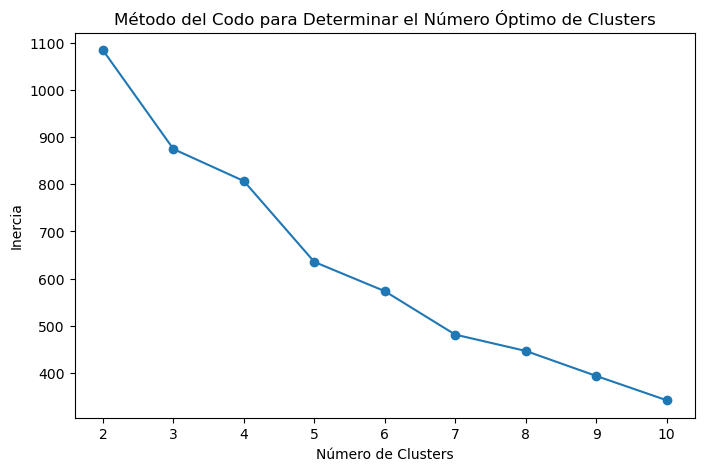

In [21]:
# Aplicar PCA con 5 componentes principales
pca = PCA(n_components=5)
data_pca_5 = pca.fit_transform(data_top_50_scaled)

# Determinar el número óptimo de clusters usando el método del codo
inertia = []
for n_clusters in range(2, 11):  # Probar entre 2 y 10 clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_pca_5)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()

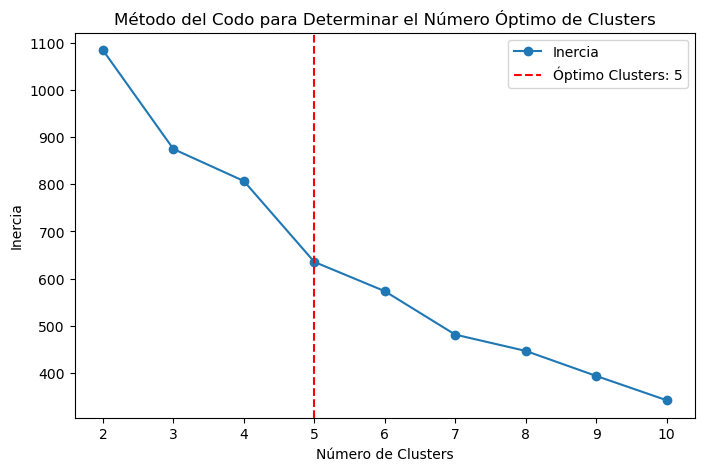

Número óptimo de clusters según el método del codo: 5


In [22]:
# Determinar el número óptimo de clusters usando el método del codo
inertia = []
for n_clusters in range(2, 11):  # Probar entre 2 y 10 clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_pca_5)
    inertia.append(kmeans.inertia_)

# Encontrar el codo usando kneed
kneedle = KneeLocator(range(2, 11), inertia, curve='convex', direction='decreasing')
optimal_clusters = kneedle.elbow

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), inertia, marker='o', label='Inercia')
plt.axvline(x=optimal_clusters, color='r', linestyle='--', label=f'Óptimo Clusters: {optimal_clusters}')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.legend()
plt.show()
print(f'Número óptimo de clusters según el método del codo: {optimal_clusters}')

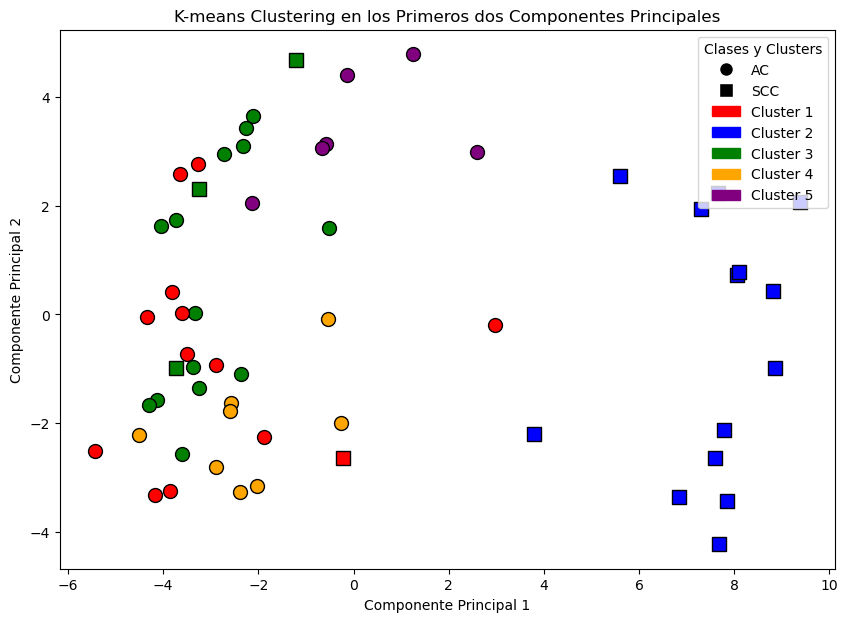

In [23]:
# Aplicar K-means con el número óptimo de clusters 
optimal_clusters = 5 
kmeans = KMeans(n_clusters=optimal_clusters, random_state=40)
clusters = kmeans.fit_predict(data_pca_5)

# Añadir los resultados al DataFrame original
data['KMeans_Cluster'] = clusters
colors = ['red', 'blue', 'green', 'orange', 'purple']
cmap = ListedColormap(colors)

# Asignar marcadores diferentes para AC y SCC
markers = {'AC': 'o', 'SCC': 's'} 

# Visualizar los resultados de clustering en los primeros dos componentes principales
plt.figure(figsize=(10, 7))
for i, label in enumerate(data['Labels']):
    plt.scatter(
        data_pca_5[i, 0], data_pca_5[i, 1], 
        c=cmap(clusters[i]),  # Asignar color del cluster
        marker=markers[label],  # Asignar marcador basado en AC o SCC
        edgecolor='k',  
        s=100  
    )
plt.title('K-means Clustering en los Primeros dos Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Crear leyendas combinadas para clases y clusters
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='k', markersize=10, label='AC'),
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='k', markersize=10, label='SCC'),
    mpatches.Patch(color='red', label='Cluster 1'),
    mpatches.Patch(color='blue', label='Cluster 2'),
    mpatches.Patch(color='green', label='Cluster 3'),
    mpatches.Patch(color='orange', label='Cluster 4'),
    mpatches.Patch(color='purple', label='Cluster 5')
]
plt.legend(handles=legend_elements, title="Clases y Clusters", loc='upper right') # Añadir la leyenda combinada en la esquina superior derecha
plt.show()

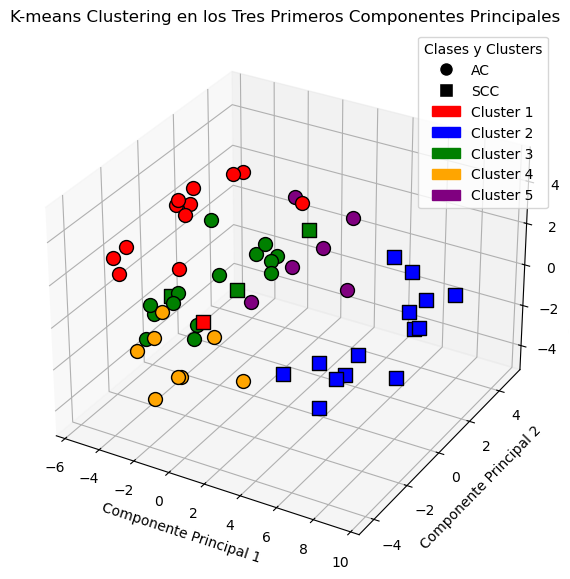

In [24]:
# Paleta de colores 
colors = ['red', 'blue', 'green', 'orange', 'purple']
cmap = ListedColormap(colors)

# Asignar marcadores diferentes para AC y SCC
markers = {'AC': 'o', 'SCC': 's'}  

# Crear una figura para el gráfico 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Visualizar los puntos en los tres primeros componentes principales
for i, label in enumerate(data['Labels']):
    ax.scatter(
        data_pca_5[i, 0], data_pca_5[i, 1], data_pca_5[i, 2], 
        c=[cmap(clusters[i])],  # Asignar color del cluster
        marker=markers[label],  # Asignar marcador basado en AC o SCC
        edgecolor='k',  
        s=100)  
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.set_title('K-means Clustering en los Tres Primeros Componentes Principales')
# Leyedas
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='k', markersize=10, label='AC'),
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='k', markersize=10, label='SCC'),
    mpatches.Patch(color='red', label='Cluster 1'),
    mpatches.Patch(color='blue', label='Cluster 2'),
    mpatches.Patch(color='green', label='Cluster 3'),
    mpatches.Patch(color='orange', label='Cluster 4'),
    mpatches.Patch(color='purple', label='Cluster 5')
]
ax.legend(handles=legend_elements, title="Clases y Clusters", loc='upper right') #> Leyenda
plt.show()

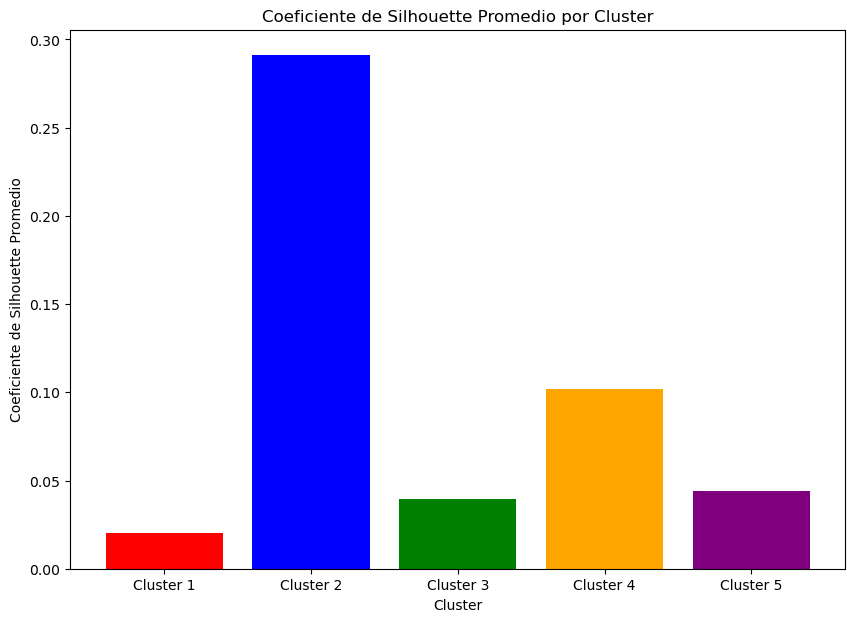

In [76]:
# Calcular el coeficiente de silhouette para cada muestra
sample_silhouette_values = silhouette_samples(data_scaled, clusters)

# Calcular el promedio del coeficiente de silhouette por cluster
average_silhouette_values = [np.mean(sample_silhouette_values[clusters == i]) for i in range(5)]
plt.figure(figsize=(10, 7))

# Gráfico de barras para el promedio de coeficientes de silhouette
plt.bar(range(5), average_silhouette_values, color=colors)
plt.xticks(range(5), [f'Cluster {i+1}' for i in range(5)])
plt.xlabel('Cluster')
plt.ylabel('Coeficiente de Silhouette Promedio')
plt.title('Coeficiente de Silhouette Promedio por Cluster')
plt.show()

### El Cluster 2 presenta un buen coeficiente de silueta promedio, lo que podria indicar una expresión similar entre sus miembros, pudiendo encontrar un patron de expresion genica claro para el subtipo SCC

In [79]:
# Filtrar el DataFrame para incluir solo los 50 genes más variables, la columna de clusters, y la columna de etiquetas
data_top_50_with_labels_and_clusters = data[top_50_genes.tolist() + ['KMeans_Cluster', 'Labels']]
data_top_50_with_labels_and_clusters.sample(n=15)

,201820_at,209125_at,206291_at,211735_x_at,205982_x_at,202831_at,38691_s_at,205064_at,224588_at,220542_s_at,...,228782_at,214580_x_at,221728_x_at,208539_x_at,221854_at,218835_at,221796_at,210065_s_at,KMeans_Cluster,Labels
GSM258571,2.029584,9.17183,2.355493,1.970917,2.25083,10.72543,1.981769,2.201744,2.358439,2.68289,...,2.264752,7.864379,2.005066,3.188956,2.264125,4.144382,3.134413,2.354946,4,AC
GSM258578,13.020502,13.277252,2.317216,9.780489,10.272892,13.311033,11.227494,12.134448,2.34138,2.551359,...,5.85372,11.27013,1.998517,12.783185,9.95652,12.156197,12.969171,8.146881,1,SCC
GSM258591,2.322721,8.267973,2.32983,10.51345,10.98985,12.574044,12.044546,2.96744,11.430559,12.212552,...,13.54955,7.021886,9.62226,3.203077,4.498978,14.768141,4.742919,2.337816,3,AC
GSM258551,2.073475,2.778874,2.443437,12.390976,12.881242,8.588587,13.291952,2.226054,2.404115,9.779667,...,13.621635,3.747593,2.01393,2.771899,2.149262,13.940105,3.039879,2.38907,3,AC
GSM258555,12.939485,13.571451,13.082651,2.105561,2.066233,13.41555,2.493811,10.937519,2.30689,2.661188,...,2.620798,11.624994,1.97739,12.151228,11.350556,2.477057,13.14731,13.247504,1,SCC
GSM258608,2.313126,8.627142,2.38505,11.458507,11.880042,7.799317,12.853396,4.584954,2.348999,10.635834,...,9.826055,6.10775,1.994087,3.071131,2.264665,13.516927,2.892677,2.311914,2,AC
GSM258558,2.217026,2.548608,2.333524,2.150107,2.583925,2.537735,4.200238,2.216946,2.367712,3.435204,...,9.766535,2.941845,2.011782,3.199837,2.272794,10.177223,6.66676,2.331855,2,AC
GSM258560,2.039183,2.30117,2.343072,9.45297,10.0105,2.089481,10.960104,2.197996,10.402014,6.82017,...,9.882762,2.58818,8.408236,3.212415,6.258928,14.670286,4.925414,2.296993,0,AC
GSM258600,2.332762,3.840108,2.306848,3.613736,4.940381,2.906913,6.145905,2.190246,12.208775,13.901918,...,10.366969,3.16722,10.043484,2.976656,2.258361,8.424568,2.605881,2.294033,0,AC
GSM258557,13.511605,13.34626,2.323647,1.997796,2.084153,8.132601,2.61357,9.716998,2.350348,12.385325,...,7.396684,11.885651,2.008974,10.082825,8.579695,8.127113,4.978064,2.325037,1,SCC


### Solo nos quedaremos con los clusteres que agrupen celulas de un mismo tipo:

In [29]:
# Contar el número de muestras de cada tipo (AC o SCC) en cada cluster
cluster_counts = data_top_50_with_labels_and_clusters.groupby(['KMeans_Cluster', 'Labels']).size().unstack(fill_value=0)
print("Conteo de muestras de cada tipo (AC o SCC) en cada cluster:") # Mostrar celulas x cluster
print(cluster_counts)

Conteo de muestras de cada tipo (AC o SCC) en cada cluster:
Labels          AC  SCC
KMeans_Cluster         
0               12    1
1                0   14
2               14    3
3                8    0
4                6    0


In [30]:
cluster_reassignment = {0: 1, 1: 2, 2: 3, 3: 4, 4: 5} #> Diccionario reasignación de clusters

# Reasignar los clusters en el DataFrame
data_top_50_with_labels_and_clusters['KMeans_Cluster'] = data_top_50_with_labels_and_clusters['KMeans_Cluster'].replace(cluster_reassignment)
print(data_top_50_with_labels_and_clusters['KMeans_Cluster'].value_counts())

KMeans_Cluster
3    17
2    14
1    13
4     8
5     6
Name: count, dtype: int64


In [31]:
# Contar el número de muestras de cada tipo (AC o SCC) en cada cluster
cluster_counts = data_top_50_with_labels_and_clusters.groupby(['KMeans_Cluster', 'Labels']).size().unstack(fill_value=0)
print("Conteo de muestras de cada tipo (AC o SCC) en cada cluster:")
print(cluster_counts)

Conteo de muestras de cada tipo (AC o SCC) en cada cluster:
Labels          AC  SCC
KMeans_Cluster         
1               12    1
2                0   14
3               14    3
4                8    0
5                6    0


# Mapa de calor de los 50 genes mas variables en los clusteres 2, 4 y 5

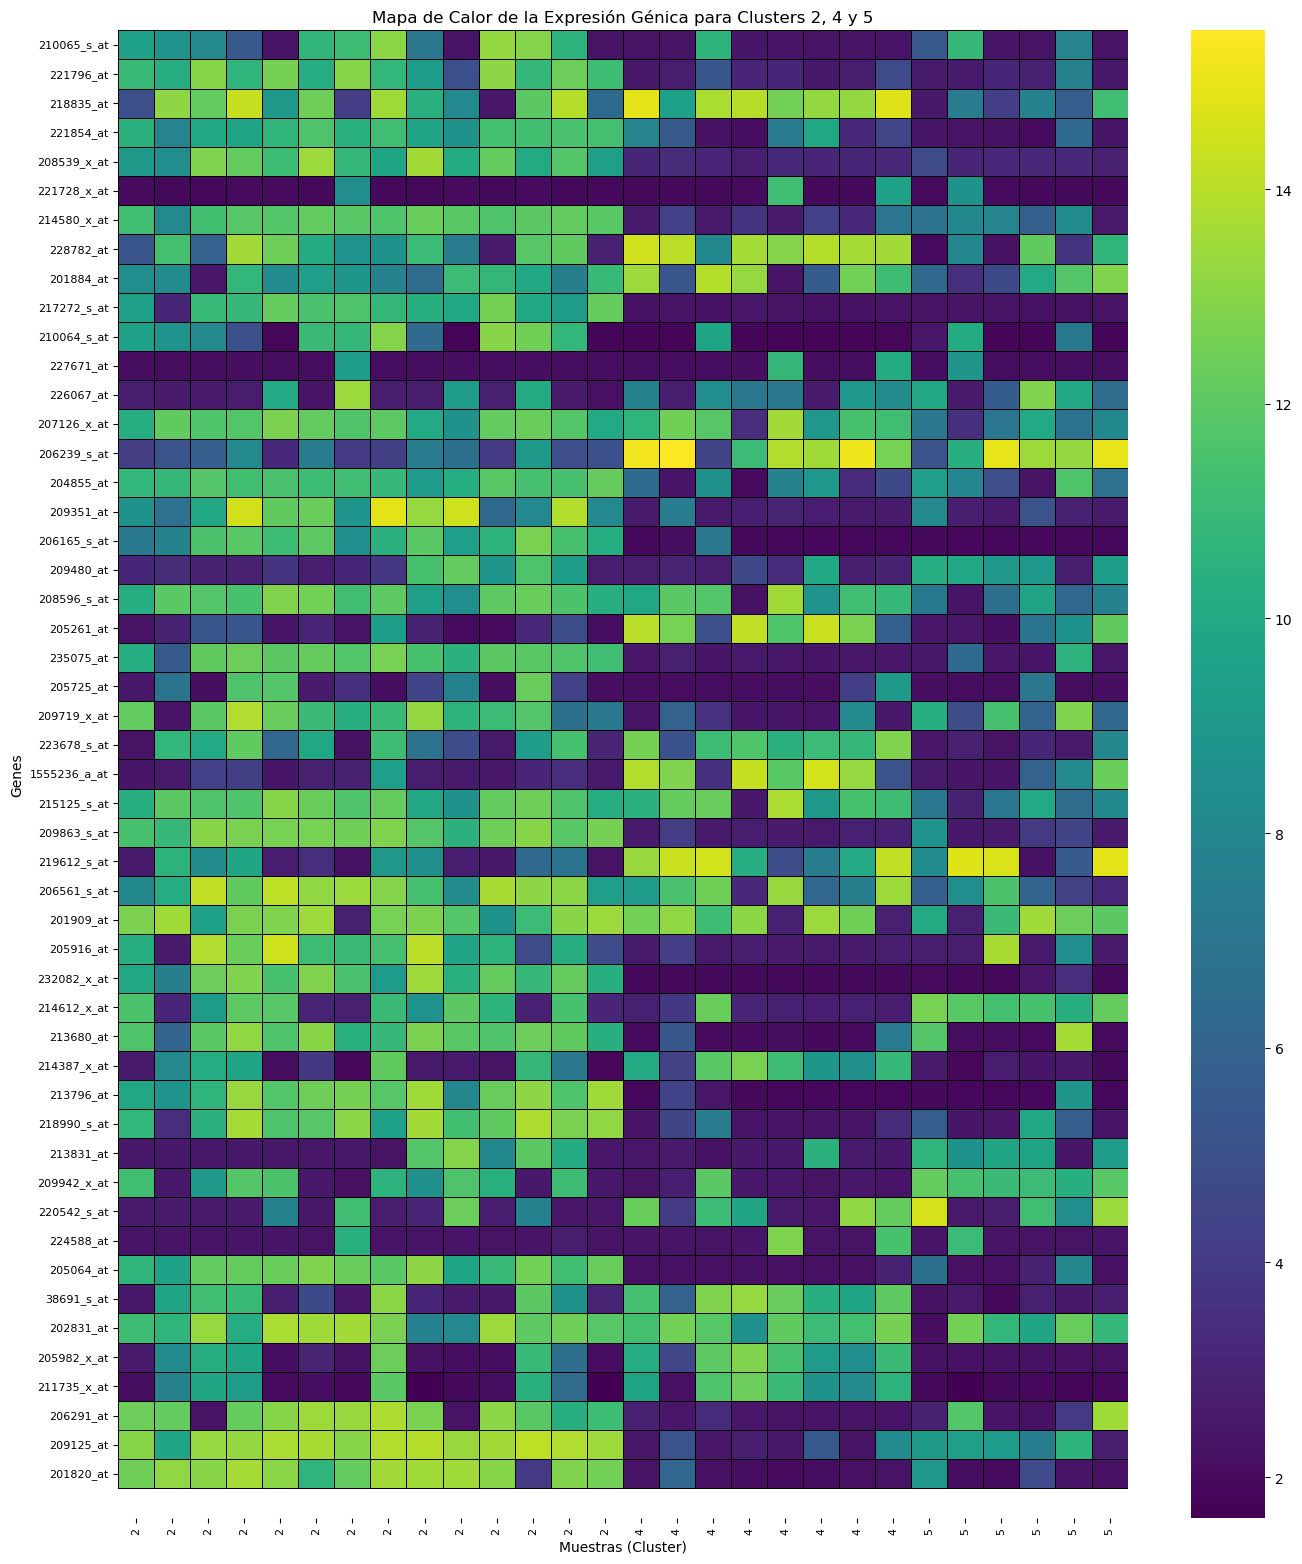

In [64]:
clusters_of_interest = [2, 4, 5]
filtered_data = data_top_50_with_labels_and_clusters[data_top_50_with_labels_and_clusters['KMeans_Cluster'].isin(clusters_of_interest)]
filtered_data_sorted = filtered_data.sort_values(by='KMeans_Cluster') # Ordenar las muestras por cluster

# Separar las columnas de expresión génica
expression_data = filtered_data_sorted.drop(columns=['Labels', 'KMeans_Cluster'])
expression_data = expression_data.apply(pd.to_numeric, errors='coerce')
expression_data = expression_data.dropna(axis=1, how='any')

# Obtener las etiquetas de los clusters y las muestras
cluster_labels = filtered_data_sorted['KMeans_Cluster'].astype(str).values
sample_labels = filtered_data_sorted['Labels'].values

# Heatmap
fig, ax = plt.subplots(figsize=(len(cluster_labels) * 0.5, len(expression_data.columns) * 0.3))  # Ajustar tamaño de la figura
sns.heatmap(expression_data.T, cmap='viridis', annot=False, linewidths=0.5, linecolor='black', ax=ax)
ax.set_xticks(np.arange(len(cluster_labels)) + 0.5) 
ax.set_xticklabels(cluster_labels, rotation=90, fontsize=8)  # Etiquetas de clusters en el eje x
ax.set_yticks(np.arange(len(expression_data.columns)) + 0.5)
ax.set_yticklabels(expression_data.columns, fontsize=8)
ax.set_ylim([-1, len(expression_data.columns)])  
plt.title('Mapa de Calor de la Expresión Génica para Clusters 2, 4 y 5')
plt.xlabel('Muestras (Cluster)')
plt.ylabel('Genes')
plt.tight_layout(rect=[0, 0, 1, 1.05])  
plt.show()

### Si bien se puede apreciar un patron de expresión, nos quedaremos solo con los 3 genes que presenten menos variabilidad entre los clusters 4 y 5, esto para asegurarnos que el subtipo celular AC quede bien representado a traves del cluster 4 y 5 

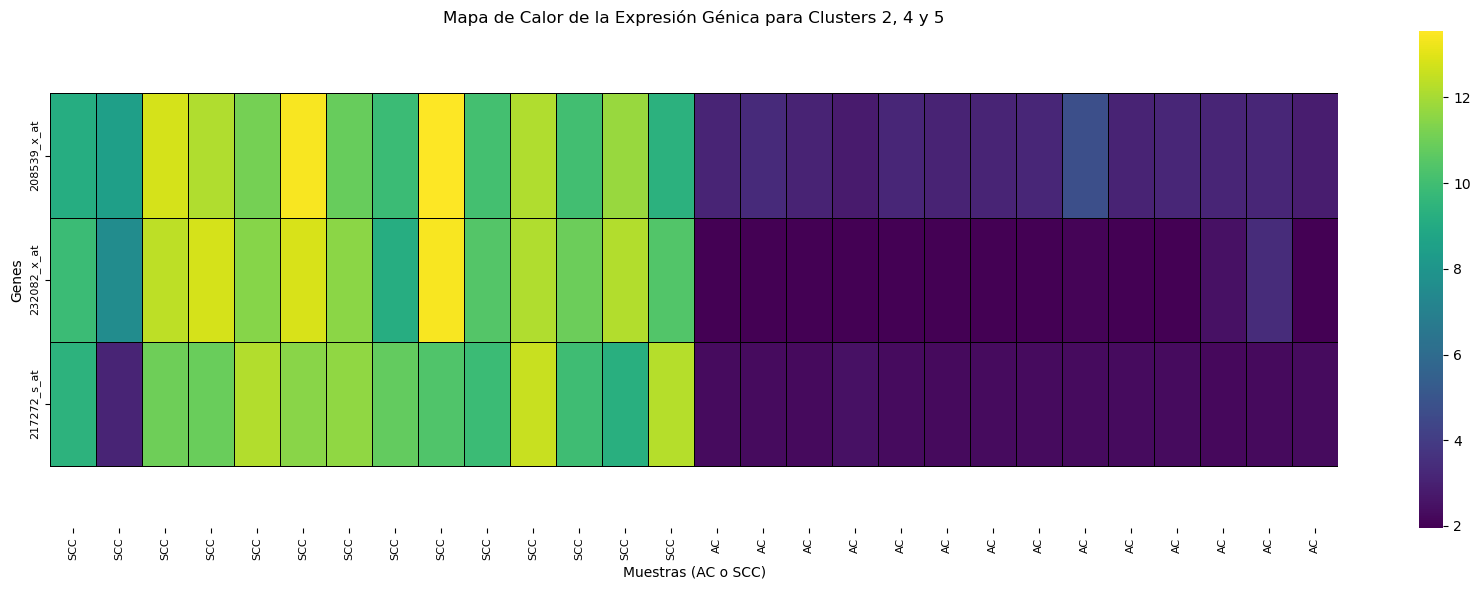

In [72]:
clusters_of_interest = [2, 4, 5]
filtered_data2 = data_top_50_with_labels_and_clusters[data_top_50_with_labels_and_clusters['KMeans_Cluster'].isin(clusters_of_interest)]
expression_data = filtered_data2.drop(columns=['Labels', 'KMeans_Cluster'])
expression_data = expression_data.apply(pd.to_numeric, errors='coerce')
expression_data = expression_data.dropna(axis=1, how='any')

# Varianza de cada gen en los clusters 4 y 5
var_cluster_4 = expression_data[filtered_data2['KMeans_Cluster'] == 4].var()
var_cluster_5 = expression_data[filtered_data2['KMeans_Cluster'] == 5].var()

# Diferencia de varianza entre clusters 4 y 5
variance_diff = (var_cluster_4 - var_cluster_5).abs()
top_genes = variance_diff.nsmallest(3).index # Seleccionar los 3 genes con la menor varianza entre clusters 4 y 5

# Filtrar el DataFrame para incluir solo estos 3 genes y los clusters de interés
filtered_data2_top_genes = filtered_data2[['KMeans_Cluster', 'Labels'] + list(top_genes)]
filtered_data2_sorted = filtered_data2_top_genes.sort_values(by='KMeans_Cluster') # Ordenar las muestras por cluster

# Separar las columnas de expresión génica
expression_data_top_genes = filtered_data2_sorted.drop(columns=['Labels', 'KMeans_Cluster'])
expression_data_top_genes = expression_data_top_genes.apply(pd.to_numeric, errors='coerce')
expression_data_top_genes = expression_data_top_genes.dropna(axis=1, how='any')

# Etiquetas
cluster_labels = filtered_data2_sorted['KMeans_Cluster'].astype(str).values
sample_labels = filtered_data2_sorted['Labels'].values
type_mapping = {
    'AC': 'AC',
    'SCC': 'SCC'
}
x_labels = [type_mapping[label] for label in sample_labels]

# Heatmap
fig, ax = plt.subplots(figsize=(max(len(cluster_labels) * 0.6, 10), max(len(expression_data_top_genes.columns) * 0.5, 6)))
sns.heatmap(expression_data_top_genes.T, cmap='viridis', annot=False, linewidths=0.5, linecolor='black', ax=ax)
ax.set_xticks(np.arange(len(cluster_labels)) + 0.5)
ax.set_xticklabels(x_labels, rotation=90, fontsize=8)
ax.set_yticks(np.arange(len(expression_data_top_genes.columns)) + 0.5)
ax.set_yticklabels(expression_data_top_genes.columns, fontsize=8)
ax.set_ylim([-0.5, len(expression_data_top_genes.columns) + 0.5])
plt.title('Mapa de Calor de la Expresión Génica para Clusters 2, 4 y 5')
plt.xlabel('Muestras (AC o SCC)')
plt.ylabel('Genes')
plt.tight_layout()
plt.show()




# Discusión
### En este análisis, empleamos el algoritmo de clustering K-medis para identificar clusters relevantes en nuestro conjunto de datos de expresión génica. La selección de clusters de interés nos permitió enfocar el análisis en patrones de expresión que distinguen los subtipos celulares de carcinoma de células escamosas (SCC) y adenocarcinoma (AC).

### Como resultado de este análisis, identificamos tres genes que están sobreexpresados en el subtipo SCC e infraexpresados en el subtipo AC. Estos genes presentan una diferencia significativa en su expresión entre los dos subtipos, lo que sugiere que podrían ser utilizados como biomarcadores para la diferenciación de estos tipos de cáncer. Además, estos genes podrían representar blancos potenciales para terapias dirigidas, dada su variabilidad en la expresión entre los subtipos de células tumorales.

Referencia: 
Kuner R, Muley T, Meister M, Ruschhaupt M et al. Global gene expression analysis reveals specific patterns of cell junctions in non-small cell lung cancer subtypes. Lung Cancer 2009 Jan;63(1):32-8. PMID: 18486272